# Build a Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_columns', 1000000000000)
pd.set_option('display.max_info_rows', 1000000000000000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Import & Explore Data

In [3]:
loan_data_inputs_train = pd.read_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/loan_data_targets_test.csv', index_col = 0)

C:\Users\marcu\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
loan_data_inputs_train.head()

,emp_length,earliest_cr_line,term,issue_d,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,total_rev_hi_lim,funded_amnt,annual_inc,acc_now_delinq,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,int_rate,installment,mths_since_last_delinq,dti,mths_since_last_record,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:IA_AR_MS_AL,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,purpose:educ_smallbus,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,mths_since_issue_d:109-173,int_rate_factor,int_rate:<8.905,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt_factor,funded_amnt:<13140,funded_amnt:13140-35260,funded_amnt:35260-40000,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:595-680,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:4-21,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,open_acc:35-76,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:5-11,pub_rec:>=12,total_acc

In [5]:
loan_data_targets_train.head()

,good_bad
1986640,1
2097124,1
728646,1
718214,1
700110,1


In [6]:
loan_data_inputs_train.shape

(2340393, 283)

In [7]:
loan_data_targets_train.shape

(2340393, 1)

In [8]:
loan_data_inputs_test.head()

,emp_length,earliest_cr_line,term,issue_d,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,total_rev_hi_lim,funded_amnt,annual_inc,acc_now_delinq,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,int_rate,installment,mths_since_last_delinq,dti,mths_since_last_record,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Issued,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:ND,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:IA_AR_MS_AL,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,purpose:educ_smallbus,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d_factor,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,mths_since_issue_d:109-173,int_rate_factor,int_rate:<8.905,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt_factor,funded_amnt:<13140,funded_amnt:13140-35260,funded_amnt:35260-40000,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:595-680,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:4-21,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,open_acc:35-76,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:5-11,pub_rec:>=12,total_acc

In [9]:
loan_data_inputs_test.shape

(585099, 283)

In [10]:
loan_data_targets_test.head()

,good_bad
2628632,1
2843117,1
2661856,1
1664660,0
589993,1


In [11]:
loan_data_targets_test.shape

(585099, 1)

### Selecting Features

In [12]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:G',
'grade:F',
'grade:E',
'grade:D',
'grade:C',
'grade:B',
'grade:A',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:IA_AR_MS_AL',
'addr_state:OK_NV_LA',
'addr_state:HI_NM',
'addr_state:MD_MO_NC_PA_SD',
'addr_state:IN_NJ_TN_MI_VA_KY',
'addr_state:MN_NE_AZ',
'addr_state:OH_AK_DE_MA_WI_GA',
'addr_state:UT_RI_IL_CT',
'addr_state:WY_KS_MT',
'addr_state:ND_CO_WA',
'addr_state:SC_NH',
'addr_state:DC_OR',
'addr_state:ID_WV_VT',
'addr_state:CA',
'addr_state:TX',
'addr_state:NY',
'addr_state:FL',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ_smallbus',
'purpose:renewenergy_moving',
'purpose:house_medical_other',
'purpose:majorpur_wedding_vac_homeimprov',
'purpose:credit_car',
'purpose:debt_consolidation',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7',
'emp_length:8-9',
'emp_length:10',
'mths_since_issue_d:12-16',
'mths_since_issue_d:17-19',
'mths_since_issue_d:20-22',
'mths_since_issue_d:23-25',
'mths_since_issue_d:26-28',
'mths_since_issue_d:29-41',
'mths_since_issue_d:42-60',
'mths_since_issue_d:61-108',
'mths_since_issue_d:109-173',
'int_rate:<8.905',
'int_rate:8.905-14.555',
'int_rate:14.555-20.204',
'int_rate:20.204-27.395',
'int_rate:27.395-30.99',
'funded_amnt:<13140',
'funded_amnt:13140-35260',
'funded_amnt:35260-40000',
'mths_since_earliest_cr_line:<85',
'mths_since_earliest_cr_line:85-106',
'mths_since_earliest_cr_line:107-595',
'mths_since_earliest_cr_line:595-680',
'mths_since_earliest_cr_line:681-935',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:4-21',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-2',
'open_acc:3-8',
'open_acc:9-34',
'open_acc:35-76',
'pub_rec:0',
'pub_rec:1',
'pub_rec:2-4',
'pub_rec:5-11',
'pub_rec:>=12',
'total_acc:<=28',
'total_acc:29-53',
'total_acc:>=54',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=244',
'installment:244-793',
'installment:>793',
'annual_inc:<=14,000',
'annual_inc:14,001-33,600',
'annual_inc:33,601-53,200',
'annual_inc:53,201-70,000',
'annual_inc:70,001-86,800',
'annual_inc:86,801-112,000',
'annual_inc:112,001-140,000',
'annual_inc:>140,000',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:<=18',
'mths_since_last_delinq:19-50',
'mths_since_last_delinq:51-77',
'mths_since_last_delinq:>77',
'dti:<=1.88',
'dti:1.88-4.76',
'dti:4.76-10.52',
'dti:10.52-14.84',
'dti:14.84-19.16',
'dti:19.16-22.76',
'dti:22.76-26.36',
'dti:26.36-30.68',
'dti:30.68-35',
'dti:>35',
'dti:missing',
'mths_since_last_record:Missing',
'mths_since_last_record:<=15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-60',
'mths_since_last_record:60-83',
'mths_since_last_record:83-99',
'mths_since_last_record:>99']]

In [13]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:IA_AR_MS_AL',
'verification_status:Verified',
'purpose:educ_smallbus',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:109-173',
'int_rate:<8.905',
'funded_amnt:13140-35260',
'mths_since_earliest_cr_line:595-680',
'delinq_2yrs:4-21',
'inq_last_6mths:>6',
'open_acc:35-76',
'pub_rec:5-11',
'total_acc:>=54',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'installment:>793',
'annual_inc:14,001-33,600',
'mths_since_last_delinq:<=18',
'dti:>35',
'mths_since_last_record:<=15']

In [14]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
inputs_train.head()

,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Source Verified,verification_status:Not Verified,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>=12,total_acc:<=28,total_acc:29-53,acc_now_delinq:0,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,"annual_inc:<=14,000","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",mths_since_last_delinq:Missing,mths_since_last_delinq:19-50,mths_since_last_delinq:51-77,mths_since_last_delinq:>77,dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
1986640,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2097124,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
728646,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
718214,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
700110,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [15]:
inputs_train.head()

,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Source Verified,verification_status:Not Verified,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>=12,total_acc:<=28,total_acc:29-53,acc_now_delinq:0,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,"annual_inc:<=14,000","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",mths_since_last_delinq:Missing,mths_since_last_delinq:19-50,mths_since_last_delinq:51-77,mths_since_last_delinq:>77,dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
1986640,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2097124,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
728646,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
718214,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
700110,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


### PD Model - Logistic Regression

In [16]:
# in order to be able to display p-values

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [17]:
reg = LogisticRegression_with_p_values()

In [18]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\marcu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
feature_name = inputs_train.columns.values

In [20]:
reg.intercept_

array([-0.92174624])

In [21]:
reg.coef_.shape

(1, 109)

In [22]:
np.transpose(reg.coef_).shape

(109, 1)

In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.92175
1,grade:F,0.12165
2,grade:E,0.27249
3,grade:D,0.50609
4,grade:C,0.79370
5,grade:B,1.21325
6,grade:A,1.74820
7,home_ownership:OWN,0.12116
8,home_ownership:MORTGAGE,0.27474
9,addr_state:OK_NV_LA,-0.02436


In [24]:
p_values = reg.p_values
p_values

[4.3755477259364605e-07,
 5.097579044957159e-29,
 5.608494488970648e-90,
 6.5383442186014224e-205,
 0.0,
 0.0,
 9.55676845467813e-69,
 0.0,
 0.11779530891194503,
 1.4152520171367206e-10,
 3.2278545929263986e-12,
 7.222867721932033e-25,
 2.173580695274705e-19,
 1.5918683880482087e-50,
 7.61555209394766e-86,
 2.2522601546491845e-56,
 9.216229106123329e-145,
 4.813516544142967e-102,
 1.135645873670168e-113,
 2.8517765138793154e-81,
 1.0265556515032328e-18,
 4.020708018044947e-15,
 0.00021582689886472857,
 0.01623776719441503,
 0.007100227260819291,
 2.2064583449773393e-169,
 1.1341906841035366e-15,
 4.231127442985605e-55,
 2.2711162080697356e-43,
 1.432941375187448e-67,
 4.779636675667729e-56,
 1.537830746243153e-13,
 2.670691736676913e-206,
 6.67185767682789e-62,
 1.9945797363676068e-176,
 2.0649684273222284e-122,
 7.000569716920835e-69,
 4.534414690896322e-81,
 1.6337690351672095e-262,
 3.110465661825447e-182,
 2.1122347008350427e-257,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0004272770035522402,
 5.

In [25]:
p_values = np.append(np.nan, np.array(p_values))
p_values

array([            nan, 4.37554773e-007, 5.09757904e-029, 5.60849449e-090,
       6.53834422e-205, 0.00000000e+000, 0.00000000e+000, 9.55676845e-069,
       0.00000000e+000, 1.17795309e-001, 1.41525202e-010, 3.22785459e-012,
       7.22286772e-025, 2.17358070e-019, 1.59186839e-050, 7.61555209e-086,
       2.25226015e-056, 9.21622911e-145, 4.81351654e-102, 1.13564587e-113,
       2.85177651e-081, 1.02655565e-018, 4.02070802e-015, 2.15826899e-004,
       1.62377672e-002, 7.10022726e-003, 2.20645834e-169, 1.13419068e-015,
       4.23112744e-055, 2.27111621e-043, 1.43294138e-067, 4.77963668e-056,
       1.53783075e-013, 2.67069174e-206, 6.67185768e-062, 1.99457974e-176,
       2.06496843e-122, 7.00056972e-069, 4.53441469e-081, 1.63376904e-262,
       3.11046566e-182, 2.11223470e-257, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.27277004e-004, 5.28425079e-014,
       3.11750735e-024, 1.64877731e-049, 4.87906279e-071, 4.30936180e-062,
       1.97160865e-092, 1

In [26]:
summary_table['p_values'] = p_values

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.92175,NaN
1,grade:F,0.12165,0.00000
2,grade:E,0.27249,0.00000
3,grade:D,0.50609,0.00000
4,grade:C,0.79370,0.00000
5,grade:B,1.21325,0.00000
6,grade:A,1.74820,0.00000
7,home_ownership:OWN,0.12116,0.00000
8,home_ownership:MORTGAGE,0.27474,0.00000
9,addr_state:OK_NV_LA,-0.02436,0.11780


In [28]:
# removing features whose coefficients are not statistically significant

inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:G',
'grade:F',
'grade:E',
'grade:D',
'grade:C',
'grade:B',
'grade:A',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:IA_AR_MS_AL',
'addr_state:OK_NV_LA',
'addr_state:HI_NM',
'addr_state:MD_MO_NC_PA_SD',
'addr_state:IN_NJ_TN_MI_VA_KY',
'addr_state:MN_NE_AZ',
'addr_state:OH_AK_DE_MA_WI_GA',
'addr_state:UT_RI_IL_CT',
'addr_state:WY_KS_MT',
'addr_state:ND_CO_WA',
'addr_state:SC_NH',
'addr_state:DC_OR',
'addr_state:ID_WV_VT',
'addr_state:CA',
'addr_state:TX',
'addr_state:NY',
'addr_state:FL',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ_smallbus',
'purpose:renewenergy_moving',
'purpose:house_medical_other',
'purpose:majorpur_wedding_vac_homeimprov',
'purpose:credit_car',
'purpose:debt_consolidation',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7',
'emp_length:8-9',
'emp_length:10',
'mths_since_issue_d:12-16',
'mths_since_issue_d:17-19',
'mths_since_issue_d:20-22',
'mths_since_issue_d:23-25',
'mths_since_issue_d:26-28',
'mths_since_issue_d:29-41',
'mths_since_issue_d:42-60',
'mths_since_issue_d:61-108',
'mths_since_issue_d:109-173',
'int_rate:<8.905',
'int_rate:8.905-14.555',
'int_rate:14.555-20.204',
'int_rate:20.204-27.395',
'int_rate:27.395-30.99',
'funded_amnt:<13140',
'funded_amnt:13140-35260',
'funded_amnt:35260-40000',
'mths_since_earliest_cr_line:<85',
'mths_since_earliest_cr_line:85-106',
'mths_since_earliest_cr_line:107-595',
'mths_since_earliest_cr_line:595-680',
'mths_since_earliest_cr_line:681-935',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:4-21',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-2',
'open_acc:3-8',
'open_acc:9-34',
'open_acc:35-76',
'pub_rec:0',
'pub_rec:1',
'pub_rec:2-4',
'pub_rec:5-11',
'pub_rec:>=12',
'total_acc:<=28',
'total_acc:29-53',
'total_acc:>=54',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=244',
'installment:244-793',
'installment:>793',
'annual_inc:<=14,000',
'annual_inc:14,001-33,600',
'annual_inc:33,601-53,200',
'annual_inc:53,201-70,000',
'annual_inc:70,001-86,800',
'annual_inc:86,801-112,000',
'annual_inc:112,001-140,000',
'annual_inc:>140,000',
'dti:<=1.88',
'dti:1.88-4.76',
'dti:4.76-10.52',
'dti:10.52-14.84',
'dti:14.84-19.16',
'dti:19.16-22.76',
'dti:22.76-26.36',
'dti:26.36-30.68',
'dti:30.68-35',
'dti:>35',
'dti:missing',
'mths_since_last_record:Missing',
'mths_since_last_record:<=15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-60',
'mths_since_last_record:60-83',
'mths_since_last_record:83-99',
'mths_since_last_record:>99']]

In [29]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY', 
'addr_state:IA_AR_MS_AL',
'verification_status:Verified',
'purpose:educ_smallbus',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:109-173',
'int_rate:<8.905',
'funded_amnt:13140-35260',
'mths_since_earliest_cr_line:595-680',
'delinq_2yrs:4-21',
'inq_last_6mths:>6',
'open_acc:35-76',
'pub_rec:5-11',
'total_acc:>=54',
'total_rev_hi_lim:<=5K',
'installment:>793',
'annual_inc:14,001-33,600',
'dti:>35',
'mths_since_last_record:<=15']

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis=1)
inputs_train.head()

,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Source Verified,verification_status:Not Verified,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>=12,total_acc:<=28,total_acc:29-53,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,"annual_inc:<=14,000","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
1986640,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2097124,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
728646,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
718214,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
700110,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\marcu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\marcu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.79818
1,grade:F,0.06817
2,grade:E,0.21844
3,grade:D,0.45267
4,grade:C,0.74002
5,grade:B,1.16258
6,grade:A,1.72397
7,home_ownership:OWN,0.12055
8,home_ownership:MORTGAGE,0.27215
9,addr_state:OK_NV_LA,-0.02724


In [34]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.79818,NaN
1,grade:F,0.06817,0.00472
2,grade:E,0.21844,0.00000
3,grade:D,0.45267,0.00000
4,grade:C,0.74002,0.00000
5,grade:B,1.16258,0.00000
6,grade:A,1.72397,0.00000
7,home_ownership:OWN,0.12055,0.00000
8,home_ownership:MORTGAGE,0.27215,0.00000
9,addr_state:OK_NV_LA,-0.02724,0.08033


### PD Model Validation (Test)

In [35]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:G',
'grade:F',
'grade:E',
'grade:D',
'grade:C',
'grade:B',
'grade:A',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:IA_AR_MS_AL',
'addr_state:OK_NV_LA',
'addr_state:HI_NM',
'addr_state:MD_MO_NC_PA_SD',
'addr_state:IN_NJ_TN_MI_VA_KY',
'addr_state:MN_NE_AZ',
'addr_state:OH_AK_DE_MA_WI_GA',
'addr_state:UT_RI_IL_CT',
'addr_state:WY_KS_MT',
'addr_state:ND_CO_WA',
'addr_state:SC_NH',
'addr_state:DC_OR',
'addr_state:ID_WV_VT',
'addr_state:CA',
'addr_state:TX',
'addr_state:NY',
'addr_state:FL',
'verification_status:Verified',
'verification_status:Source Verified',
'verification_status:Not Verified',
'purpose:educ_smallbus',
'purpose:renewenergy_moving',
'purpose:house_medical_other',
'purpose:majorpur_wedding_vac_homeimprov',
'purpose:credit_car',
'purpose:debt_consolidation',
'initial_list_status:f',
'initial_list_status:w',
'term:60',
'term:36',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7',
'emp_length:8-9',
'emp_length:10',
'mths_since_issue_d:12-16',
'mths_since_issue_d:17-19',
'mths_since_issue_d:20-22',
'mths_since_issue_d:23-25',
'mths_since_issue_d:26-28',
'mths_since_issue_d:29-41',
'mths_since_issue_d:42-60',
'mths_since_issue_d:61-108',
'mths_since_issue_d:109-173',
'int_rate:<8.905',
'int_rate:8.905-14.555',
'int_rate:14.555-20.204',
'int_rate:20.204-27.395',
'int_rate:27.395-30.99',
'funded_amnt:<13140',
'funded_amnt:13140-35260',
'funded_amnt:35260-40000',
'mths_since_earliest_cr_line:<85',
'mths_since_earliest_cr_line:85-106',
'mths_since_earliest_cr_line:107-595',
'mths_since_earliest_cr_line:595-680',
'mths_since_earliest_cr_line:681-935',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:4-21',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-2',
'open_acc:3-8',
'open_acc:9-34',
'open_acc:35-76',
'pub_rec:0',
'pub_rec:1',
'pub_rec:2-4',
'pub_rec:5-11',
'pub_rec:>=12',
'total_acc:<=28',
'total_acc:29-53',
'total_acc:>=54',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'installment:<=244',
'installment:244-793',
'installment:>793',
'annual_inc:<=14,000',
'annual_inc:14,001-33,600',
'annual_inc:33,601-53,200',
'annual_inc:53,201-70,000',
'annual_inc:70,001-86,800',
'annual_inc:86,801-112,000',
'annual_inc:112,001-140,000',
'annual_inc:>140,000',
'dti:<=1.88',
'dti:1.88-4.76',
'dti:4.76-10.52',
'dti:10.52-14.84',
'dti:14.84-19.16',
'dti:19.16-22.76',
'dti:22.76-26.36',
'dti:26.36-30.68',
'dti:30.68-35',
'dti:>35',
'dti:missing',
'mths_since_last_record:Missing',
'mths_since_last_record:<=15',
'mths_since_last_record:15-38',
'mths_since_last_record:38-60',
'mths_since_last_record:60-83',
'mths_since_last_record:83-99',
'mths_since_last_record:>99']]

In [36]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Source Verified,verification_status:Not Verified,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>=12,total_acc:<=28,total_acc:29-53,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,"annual_inc:<=14,000","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
2628632,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2843117,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2661856,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1664660,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
589993,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [37]:
y_hat_test = reg2.model.predict(inputs_test)
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.23420373, 0.76579627],
       [0.12163276, 0.87836724],
       [0.14404667, 0.85595333],
       ...,
       [0.09589791, 0.90410209],
       [0.2293063 , 0.7706937 ],
       [0.10996446, 0.89003554]])

In [39]:
y_hat_test_proba = y_hat_test_proba[:,1]
y_hat_test_proba

array([0.76579627, 0.87836724, 0.85595333, ..., 0.90410209, 0.7706937 ,
       0.89003554])

In [40]:
loan_data_targets_test_temp = loan_data_targets_test

In [41]:
loan_data_targets_test_temp.head()

,good_bad
2628632,1
2843117,1
2661856,1
1664660,0
589993,1


In [42]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [43]:
loan_data_targets_test_temp.head(20)

,good_bad
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [44]:
a = pd.DataFrame(y_hat_test_proba)
a.head()

,0
0,0.76580
1,0.87837
2,0.85595
3,0.80244
4,0.97838


In [45]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, a], axis=1)
df_actual_predicted_probs.head(50)

,good_bad,0
0,1,0.76580
1,1,0.87837
2,1,0.85595
3,0,0.80244
4,1,0.97838
5,1,0.97630
6,1,0.85515
7,1,0.94510
8,1,0.97627
9,1,0.90320


In [46]:
df_actual_predicted_probs.shape

(585099, 2)

In [47]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.76580
1,1,0.87837
2,1,0.85595
3,0,0.80244
4,1,0.97838


In [48]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [49]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
2628632,1,0.76580
2843117,1,0.87837
2661856,1,0.85595
1664660,0,0.80244
589993,1,0.97838


# Evaluation of Model Performance

### Accuracy & Area Under the Curve

In [50]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [51]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
2628632,1,0.76580,0
2843117,1,0.87837,0
2661856,1,0.85595,0
1664660,0,0.80244,0
589993,1,0.97838,1


In [52]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,63208,12400
1,249491,260000


In [53]:
df_actual_predicted_probs.shape

(585099, 3)

In [54]:
a = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted']) / 585099
a

Predicted,0,1
Actual,,
0,0.10803,0.02119
1,0.42641,0.44437


In [55]:
# Accuracy
a.iloc[0,0] + a.iloc[1,1]

0.5523988248142622

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99993387, 0.99993387,
        1.        ]),
 array([0.00000000e+00, 1.96274321e-06, 5.24052437e-04, ...,
        9.99998037e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99955619, 0.99955619, 0.99920995, ..., 0.36579851, 0.36374192,
        0.32102583]))

In [58]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

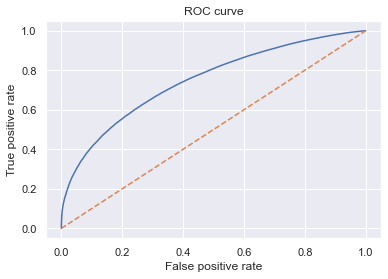

In [59]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [60]:
# Area under the curve
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC
# Interpretation = fair

0.747377139313283

### Gini and Kolmogorov-Smirnov

In [61]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
2582251,0,0.32103,0
2232945,0,0.34879,0
351783,0,0.35174,0
2415200,0,0.35813,0
2013518,0,0.35993,0


In [62]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
1830797,1,0.99950,1
1748198,1,0.99951,1
1743514,1,0.99953,1
1830854,1,0.99954,1
1867250,1,0.99956,1


In [63]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,2582251,0,0.32103,0
1,2232945,0,0.34879,0
2,351783,0,0.35174,0
3,2415200,0,0.35813,0
4,2013518,0,0.35993,0


In [64]:
df_actual_predicted_probs.index + 1

RangeIndex(start=1, stop=585100, step=1)

In [65]:
df_actual_predicted_probs['loan_data_targets_test'].cumsum().head(50)

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      1
9      1
10     1
11     2
12     2
13     3
14     3
15     3
16     4
17     4
18     4
19     4
20     5
21     6
22     6
23     7
24     7
25     8
26     8
27     8
28     8
29     9
30     9
31     9
32     9
33    10
34    10
35    11
36    11
37    12
38    13
39    14
40    14
41    14
42    15
43    15
44    15
45    16
46    16
47    17
48    17
49    18
Name: loan_data_targets_test, dtype: int64

In [66]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['Cumulative N Good']

In [67]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,2582251,0,0.32103,0,1,0,1
1,2232945,0,0.34879,0,2,0,2
2,351783,0,0.35174,0,3,0,3
3,2415200,0,0.35813,0,4,0,4
4,2013518,0,0.35993,0,5,0,5


In [68]:
df_actual_predicted_probs['loan_data_targets_test'].sum()

509491

In [69]:
585099 - df_actual_predicted_probs['loan_data_targets_test'].sum()

75608

In [70]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / 585099
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / 509491
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / 75608

In [71]:
df_actual_predicted_probs.head(50)

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,2582251,0,0.32103,0,1,0,1,0.00000,0.00000,0.00001
1,2232945,0,0.34879,0,2,0,2,0.00000,0.00000,0.00003
2,351783,0,0.35174,0,3,0,3,0.00001,0.00000,0.00004
3,2415200,0,0.35813,0,4,0,4,0.00001,0.00000,0.00005
4,2013518,0,0.35993,0,5,0,5,0.00001,0.00000,0.00007
5,2135499,1,0.36374,0,6,1,5,0.00001,0.00000,0.00007
6,1607690,0,0.36580,0,7,1,6,0.00001,0.00000,0.00008
7,2267757,0,0.36621,0,8,1,7,0.00001,0.00000,0.00009
8,2003395,0,0.36636,0,9,1,8,0.00002,0.00000,0.00011
9,73429,0,0.36720,0,10,1,9,0.00002,0.00000,0.00012


Text(0.5, 1.0, 'Gini')

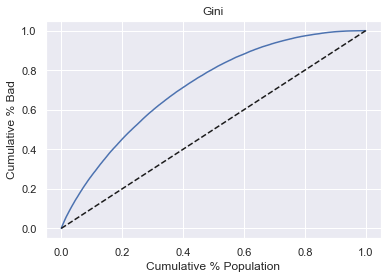

In [72]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [73]:
GINI = AUROC * 2 - 1
GINI

0.49475427862656596

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

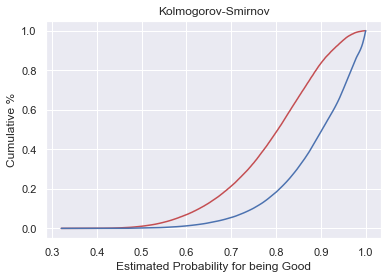

In [74]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [75]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.3600915001019996

# PD Model Application

### Creating a Scorecard

In [76]:
y_hat_test_proba

array([0.76579627, 0.87836724, 0.85595333, ..., 0.90410209, 0.7706937 ,
       0.89003554])

In [77]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.79818,NaN
1,grade:F,0.06817,0.00472
2,grade:E,0.21844,0.00000
3,grade:D,0.45267,0.00000
4,grade:C,0.74002,0.00000
5,grade:B,1.16258,0.00000
6,grade:A,1.72397,0.00000
7,home_ownership:OWN,0.12055,0.00000
8,home_ownership:MORTGAGE,0.27215,0.00000
9,addr_state:OK_NV_LA,-0.02724,0.08033


In [78]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:IA_AR_MS_AL',
 'verification_status:Verified',
 'purpose:educ_smallbus',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:109-173',
 'int_rate:<8.905',
 'funded_amnt:13140-35260',
 'mths_since_earliest_cr_line:595-680',
 'delinq_2yrs:4-21',
 'inq_last_6mths:>6',
 'open_acc:35-76',
 'pub_rec:5-11',
 'total_acc:>=54',
 'total_rev_hi_lim:<=5K',
 'installment:>793',
 'annual_inc:14,001-33,600',
 'dti:>35',
 'mths_since_last_record:<=15']

In [79]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values']  = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:IA_AR_MS_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ_smallbus,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:109-173,0,NaN
9,int_rate:<8.905,0,NaN


In [80]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index(drop=True)
df_scorecard

,Feature name,Coefficients,p_values
0,Intercept,-0.79818,NaN
1,grade:F,0.06817,0.00472
2,grade:E,0.21844,0.00000
3,grade:D,0.45267,0.00000
4,grade:C,0.74002,0.00000
5,grade:B,1.16258,0.00000
6,grade:A,1.72397,0.00000
7,home_ownership:OWN,0.12055,0.00000
8,home_ownership:MORTGAGE,0.27215,0.00000
9,addr_state:OK_NV_LA,-0.02724,0.08033


In [81]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard['Original feature name']

0                        Intercept
1                            grade
2                            grade
3                            grade
4                            grade
5                            grade
6                            grade
7                   home_ownership
8                   home_ownership
9                       addr_state
10                      addr_state
11                      addr_state
12                      addr_state
13                      addr_state
14                      addr_state
15                      addr_state
16                      addr_state
17                      addr_state
18                      addr_state
19                      addr_state
20                      addr_state
21                      addr_state
22                      addr_state
23                      addr_state
24                      addr_state
25             verification_status
26             verification_status
27                         purpose
28                  

In [82]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name
0,Intercept,-0.79818,NaN,Intercept
1,grade:F,0.06817,0.00472,grade
2,grade:E,0.21844,0.00000,grade
3,grade:D,0.45267,0.00000,grade
4,grade:C,0.74002,0.00000,grade
5,grade:B,1.16258,0.00000,grade
6,grade:A,1.72397,0.00000,grade
7,home_ownership:OWN,0.12055,0.00000,home_ownership
8,home_ownership:MORTGAGE,0.27215,0.00000,home_ownership
9,addr_state:OK_NV_LA,-0.02724,0.08033,addr_state


In [83]:
min_score = 300
max_score = 850

In [84]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -0.79818
addr_state                    -0.02724
annual_inc                     0.00000
delinq_2yrs                    0.00000
dti                           -0.07449
emp_length                     0.00000
funded_amnt                   -0.05741
grade                          0.00000
home_ownership                 0.00000
initial_list_status           -0.03519
inq_last_6mths                -0.24789
installment                    0.00000
int_rate                      -0.40358
mths_since_earliest_cr_line   -0.40090
mths_since_issue_d            -0.10203
mths_since_last_record        -0.06754
open_acc                       0.00000
pub_rec                       -0.32776
purpose                        0.00000
term                           0.00000
total_acc                      0.00000
total_rev_hi_lim               0.00000
verification_status            0.00000
Name: Coefficients, dtype: float64

In [85]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.5422095050882816

In [86]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -0.79818
addr_state                     0.57328
annual_inc                     0.38310
delinq_2yrs                    0.04885
dti                            0.34124
emp_length                     0.23029
funded_amnt                    0.10829
grade                          1.72397
home_ownership                 0.27215
initial_list_status            0.00000
inq_last_6mths                 0.09650
installment                    0.32646
int_rate                       0.00000
mths_since_earliest_cr_line    0.17183
mths_since_issue_d             3.80574
mths_since_last_record         0.35444
open_acc                       0.15392
pub_rec                        0.00000
purpose                        0.30457
term                           0.16488
total_acc                      0.04862
total_rev_hi_lim               0.36216
verification_status            0.15202
Name: Coefficients, dtype: float64

In [87]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

8.824135389764704

In [88]:
(max_score - min_score) / (max_sum_coef - min_sum_coef)

48.38846657284314

In [89]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,Intercept,-0.79818,NaN,Intercept,-38.62278
1,grade:F,0.06817,0.00472,grade,3.29883
2,grade:E,0.21844,0.00000,grade,10.56999
3,grade:D,0.45267,0.00000,grade,21.90381
4,grade:C,0.74002,0.00000,grade,35.80855
5,grade:B,1.16258,0.00000,grade,56.25553
6,grade:A,1.72397,0.00000,grade,83.42046
7,home_ownership:OWN,0.12055,0.00000,home_ownership,5.83311
8,home_ownership:MORTGAGE,0.27215,0.00000,home_ownership,13.16888
9,addr_state:OK_NV_LA,-0.02724,0.08033,addr_state,-1.31827


In [90]:
((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

384.39084329150967

In [91]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

<ipython-input-91-f69c049793b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,Intercept,-0.79818,NaN,Intercept,384.39084
1,grade:F,0.06817,0.00472,grade,3.29883
2,grade:E,0.21844,0.00000,grade,10.56999
3,grade:D,0.45267,0.00000,grade,21.90381
4,grade:C,0.74002,0.00000,grade,35.80855
5,grade:B,1.16258,0.00000,grade,56.25553
6,grade:A,1.72397,0.00000,grade,83.42046
7,home_ownership:OWN,0.12055,0.00000,home_ownership,5.83311
8,home_ownership:MORTGAGE,0.27215,0.00000,home_ownership,13.16888
9,addr_state:OK_NV_LA,-0.02724,0.08033,addr_state,-1.31827


In [92]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round().astype(int)
df_scorecard['Score - Preliminary']

0      384
1        3
2       11
3       22
4       36
5       56
6       83
7        6
8       13
9       -1
10       6
11       4
12       6
13       6
14       9
15      14
16      17
17      19
18      21
19      26
20      28
21       6
22       5
23       2
24       1
25       0
26       7
27      10
28      14
29      12
30      15
31      13
32      -2
33       8
34       8
35       9
36       9
37      10
38       9
39      11
40     176
41     184
42     153
43     104
44      74
45      30
46       2
47      -5
48      -6
49     -10
50     -14
51     -20
52       5
53      -3
54      -2
55       2
56       8
57     -19
58       2
59       1
60       5
61      -5
62     -12
63       1
64       5
65       7
66       1
67     -16
68      -5
69      -8
70      -3
71       2
72       1
73       2
74       4
75       6
76       9
77      11
78      14
79      18
80      16
81       6
82       6
83       4
84       7
85      10
86      14
87      16
88      19
89      -1
90       5

In [93]:
df_scorecard.groupby('Original feature name')['Score - Calculation'].min().sum()

300.0

In [94]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min()

Original feature name
Intercept                      384
addr_state                      -1
annual_inc                       0
delinq_2yrs                      0
dti                             -4
emp_length                       0
funded_amnt                     -3
grade                            0
home_ownership                   0
initial_list_status             -2
inq_last_6mths                 -12
installment                      0
int_rate                       -20
mths_since_earliest_cr_line    -19
mths_since_issue_d              -5
mths_since_last_record          -3
open_acc                         0
pub_rec                        -16
purpose                          0
term                             0
total_acc                        0
total_rev_hi_lim                 0
verification_status              0
Name: Score - Preliminary, dtype: int32

In [95]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()

299

In [96]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max()

Original feature name
Intercept                      384
addr_state                      28
annual_inc                      19
delinq_2yrs                      2
dti                             17
emp_length                      11
funded_amnt                      5
grade                           83
home_ownership                  13
initial_list_status              0
inq_last_6mths                   5
installment                     16
int_rate                         0
mths_since_earliest_cr_line      8
mths_since_issue_d             184
mths_since_last_record          17
open_acc                         7
pub_rec                          0
purpose                         15
term                             8
total_acc                        2
total_rev_hi_lim                18
verification_status              7
Name: Score - Preliminary, dtype: int32

In [97]:
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

849

In [98]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,-0.79818,NaN,Intercept,384.39084,384,-0.39084
1,grade:F,0.06817,0.00472,grade,3.29883,3,-0.29883
2,grade:E,0.21844,0.00000,grade,10.56999,11,0.43001
3,grade:D,0.45267,0.00000,grade,21.90381,22,0.09619
4,grade:C,0.74002,0.00000,grade,35.80855,36,0.19145
5,grade:B,1.16258,0.00000,grade,56.25553,56,-0.25553
6,grade:A,1.72397,0.00000,grade,83.42046,83,-0.42046
7,home_ownership:OWN,0.12055,0.00000,home_ownership,5.83311,6,0.16689
8,home_ownership:MORTGAGE,0.27215,0.00000,home_ownership,13.16888,13,-0.16888
9,addr_state:OK_NV_LA,-0.02724,0.08033,addr_state,-1.31827,-1,0.31827


In [99]:
df_scorecard.sort_values('Difference')

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
17,addr_state:ND_CO_WA,0.40287,0.00000,addr_state,19.49447,19,-0.49447
70,pub_rec:>=12,-0.05216,0.82996,pub_rec,-2.52380,-3,-0.47620
51,int_rate:27.395-30.99,-0.40358,0.00000,int_rate,-19.52885,-20,-0.47115
13,addr_state:MN_NE_AZ,0.13361,0.00000,addr_state,6.46522,6,-0.46522
35,emp_length:2-4,0.19541,0.00000,emp_length,9.45560,9,-0.45560
65,open_acc:3-8,0.15392,0.00001,open_acc,7.44774,7,-0.44774
49,int_rate:14.555-20.204,-0.19754,0.00000,int_rate,-9.55856,-10,-0.44144
6,grade:A,1.72397,0.00000,grade,83.42046,83,-0.42046
25,verification_status:Source Verified,0.00833,0.09308,verification_status,0.40324,0,-0.40324
92,dti:10.52-14.84,0.11163,0.00000,dti,5.40137,5,-0.40137


In [100]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][51] = -19

<ipython-input-100-28c72c9e2afa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][51] = -19


In [101]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300

In [102]:
df_scorecard['Score - Final'][65] = 8

<ipython-input-102-5304ecbf506c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][65] = 8


In [103]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850

### Calculating Credit Score

In [104]:
inputs_test_with_ref_cat.head()

,grade:G,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:IA_AR_MS_AL,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:educ_smallbus,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:f,initial_list_status:w,term:60,term:36,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,mths_since_issue_d:109-173,int_rate:<8.905,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:13140-35260,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:595-680,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:4-21,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,open_acc:35-76,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:5-11,pub_rec:>=12,total_acc:<=28,total_acc:29-53,total_acc:>=54,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,installment:>793,"annual_inc:<=14,000","annual_inc:14,001-33,600","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:>35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:<=15,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
2628632,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2843117,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2661856,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1664660,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
589993,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [105]:
df_scorecard

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,Intercept,-0.79818,NaN,Intercept,384.39084,384,-0.39084,384
1,grade:F,0.06817,0.00472,grade,3.29883,3,-0.29883,3
2,grade:E,0.21844,0.00000,grade,10.56999,11,0.43001,11
3,grade:D,0.45267,0.00000,grade,21.90381,22,0.09619,22
4,grade:C,0.74002,0.00000,grade,35.80855,36,0.19145,36
5,grade:B,1.16258,0.00000,grade,56.25553,56,-0.25553,56
6,grade:A,1.72397,0.00000,grade,83.42046,83,-0.42046,83
7,home_ownership:OWN,0.12055,0.00000,home_ownership,5.83311,6,0.16689,6
8,home_ownership:MORTGAGE,0.27215,0.00000,home_ownership,13.16888,13,-0.16888,13
9,addr_state:OK_NV_LA,-0.02724,0.08033,addr_state,-1.31827,-1,0.31827,-1


In [106]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [107]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [108]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:G,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:IA_AR_MS_AL,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified,purpose:educ_smallbus,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:f,initial_list_status:w,term:60,term:36,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,mths_since_issue_d:109-173,int_rate:<8.905,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:13140-35260,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:595-680,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,delinq_2yrs:4-21,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,open_acc:35-76,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:5-11,pub_rec:>=12,total_acc:<=28,total_acc:29-53,total_acc:>=54,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,installment:>793,"annual_inc:<=14,000","annual_inc:14,001-33,600","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:>35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:<=15,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99
2628632,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2843117,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2661856,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1664660,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
589993,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [109]:
df_scorecard['Feature name'].values

array(['Intercept', 'grade:F', 'grade:E', 'grade:D', 'grade:C', 'grade:B',
       'grade:A', 'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:OK_NV_LA', 'addr_state:HI_NM',
       'addr_state:MD_MO_NC_PA_SD', 'addr_state:IN_NJ_TN_MI_VA_KY',
       'addr_state:MN_NE_AZ', 'addr_state:OH_AK_DE_MA_WI_GA',
       'addr_state:UT_RI_IL_CT', 'addr_state:WY_KS_MT',
       'addr_state:ND_CO_WA', 'addr_state:SC_NH', 'addr_state:DC_OR',
       'addr_state:ID_WV_VT', 'addr_state:CA', 'addr_state:TX',
       'addr_state:NY', 'addr_state:FL',
       'verification_status:Source Verified',
       'verification_status:Not Verified', 'purpose:renewenergy_moving',
       'purpose:house_medical_other',
       'purpose:majorpur_wedding_vac_homeimprov', 'purpose:credit_car',
       'purpose:debt_consolidation', 'initial_list_status:w', 'term:36',
       'emp_length:1', 'emp_length:2-4', 'emp_length:5-6', 'emp_length:7',
       'emp_length:8-9', 'emp_length:10', 'mths_since_issue_d:12-16',


In [110]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [111]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:OK_NV_LA,addr_state:HI_NM,addr_state:MD_MO_NC_PA_SD,addr_state:IN_NJ_TN_MI_VA_KY,addr_state:MN_NE_AZ,addr_state:OH_AK_DE_MA_WI_GA,addr_state:UT_RI_IL_CT,addr_state:WY_KS_MT,addr_state:ND_CO_WA,addr_state:SC_NH,addr_state:DC_OR,addr_state:ID_WV_VT,addr_state:CA,addr_state:TX,addr_state:NY,addr_state:FL,verification_status:Source Verified,verification_status:Not Verified,purpose:renewenergy_moving,purpose:house_medical_other,purpose:majorpur_wedding_vac_homeimprov,purpose:credit_car,purpose:debt_consolidation,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:12-16,mths_since_issue_d:17-19,mths_since_issue_d:20-22,mths_since_issue_d:23-25,mths_since_issue_d:26-28,mths_since_issue_d:29-41,mths_since_issue_d:42-60,mths_since_issue_d:61-108,int_rate:8.905-14.555,int_rate:14.555-20.204,int_rate:20.204-27.395,int_rate:27.395-30.99,funded_amnt:<13140,funded_amnt:35260-40000,mths_since_earliest_cr_line:<85,mths_since_earliest_cr_line:85-106,mths_since_earliest_cr_line:107-595,mths_since_earliest_cr_line:681-935,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,open_acc:0,open_acc:1-2,open_acc:3-8,open_acc:9-34,pub_rec:0,pub_rec:1,pub_rec:2-4,pub_rec:>=12,total_acc:<=28,total_acc:29-53,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,installment:<=244,installment:244-793,"annual_inc:<=14,000","annual_inc:33,601-53,200","annual_inc:53,201-70,000","annual_inc:70,001-86,800","annual_inc:86,801-112,000","annual_inc:112,001-140,000","annual_inc:>140,000",dti:<=1.88,dti:1.88-4.76,dti:4.76-10.52,dti:10.52-14.84,dti:14.84-19.16,dti:19.16-22.76,dti:22.76-26.36,dti:26.36-30.68,dti:30.68-35,dti:missing,mths_since_last_record:Missing,mths_since_last_record:15-38,mths_since_last_record:38-60,mths_since_last_record:60-83,mths_since_last_record:83-99,mths_since_last_record:>99,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:IA_AR_MS_AL,verification_status:Verified,purpose:educ_smallbus,initial_list_status:f,term:60,emp_length:0,mths_since_issue_d:109-173,int_rate:<8.905,funded_amnt:13140-35260,mths_since_earliest_cr_line:595-680,delinq_2yrs:4-21,inq_last_6mths:>6,open_acc:35-76,pub_rec:5-11,total_acc:>=54,total_rev_hi_lim:<=5K,installment:>793,"annual_inc:14,001-33,600",dti:>35,mths_since_last_record:<=15
2628632,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2843117,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2661856,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1664660,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
589993,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


In [112]:
scorecard_scores = df_scorecard['Score - Final']

In [113]:
inputs_test_with_ref_cat_w_intercept.shape

(585099, 127)

In [114]:
scorecard_scores.shape

(127,)

In [115]:
scorecard_scores.head()

0    384
1      3
2     11
3     22
4     36
Name: Score - Final, dtype: int32

In [116]:
scorecard_scores = scorecard_scores.values.reshape(127,1)
scorecard_scores

array([[384],
       [  3],
       [ 11],
       [ 22],
       [ 36],
       [ 56],
       [ 83],
       [  6],
       [ 13],
       [ -1],
       [  6],
       [  4],
       [  6],
       [  6],
       [  9],
       [ 14],
       [ 17],
       [ 19],
       [ 21],
       [ 26],
       [ 28],
       [  6],
       [  5],
       [  2],
       [  1],
       [  0],
       [  7],
       [ 10],
       [ 14],
       [ 12],
       [ 15],
       [ 13],
       [ -2],
       [  8],
       [  8],
       [  9],
       [  9],
       [ 10],
       [  9],
       [ 11],
       [176],
       [184],
       [153],
       [104],
       [ 74],
       [ 30],
       [  2],
       [ -5],
       [ -6],
       [-10],
       [-14],
       [-19],
       [  5],
       [ -3],
       [ -2],
       [  2],
       [  8],
       [-19],
       [  2],
       [  1],
       [  5],
       [ -5],
       [-12],
       [  1],
       [  5],
       [  8],
       [  1],
       [-16],
       [ -5],
       [ -8],
       [ -3],
      

In [117]:
scorecard_scores.shape

(127, 1)

In [118]:
credit_score = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
credit_score.head(50)

,0
2628632,479
2843117,517
2661856,508
1664660,489
589993,606
993896,601
2424651,506
2703776,558
959163,601
413935,528


In [119]:
credit_score.columns = ['Credit Score']
credit_score.head(50)

,Credit Score
2628632,479
2843117,517
2661856,508
1664660,489
589993,606
993896,601
2424651,506
2703776,558
959163,601
413935,528


### From Credit Score to PD

In [120]:
sum_coef_from_score = ((credit_score['Credit Score'] - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score.head()

2628632   1.15702
2843117   1.94233
2661856   1.75634
1664660   1.36368
589993    3.78161
Name: Credit Score, dtype: float64

In [121]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

2628632   0.76079
2843117   0.87461
2661856   0.85275
1664660   0.79636
589993    0.97772
Name: Credit Score, dtype: float64

In [122]:
y_hat_test_proba[0: 5]

array([0.76579627, 0.87836724, 0.85595333, 0.80243746, 0.97837662])

### Setting Cut-offs

In [123]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [124]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,63208,12400
1,249491,260000


In [125]:
a = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

a

Predicted,0,1
Actual,,
0,0.10803,0.02119
1,0.42641,0.44437


In [126]:
a.iloc[0,0] + a.iloc[1,1]

0.5523988248142622

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

In [128]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

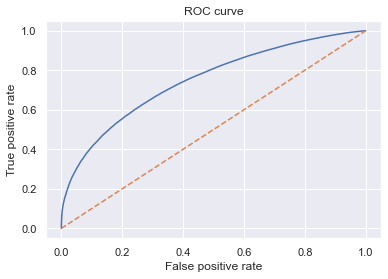

In [129]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [130]:
thresholds

array([1.99955619, 0.99955619, 0.99920995, ..., 0.36579851, 0.36374192,
       0.32102583])

In [131]:
thresholds.shape

(121288,)

In [132]:
a = pd.DataFrame(thresholds)
b = pd.DataFrame(fpr)
c = pd.DataFrame(tpr)

In [133]:
df_cutoffs = pd.concat([a,b,c], axis=1)
df_cutoffs.head()

,0,0,0
0,1.99956,0.00000,0.00000
1,0.99956,0.00000,0.00000
2,0.99921,0.00000,0.00052
3,0.99921,0.00001,0.00052
4,0.99896,0.00001,0.00227


In [134]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [135]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.99956,0.00000,0.00000
1,0.99956,0.00000,0.00000
2,0.99921,0.00000,0.00052
3,0.99921,0.00001,0.00052
4,0.99896,0.00001,0.00227


In [136]:
df_cutoffs.tail()

,thresholds,fpr,tpr
121283,0.37246,0.99987,1.00000
121284,0.37052,0.99987,1.00000
121285,0.36580,0.99993,1.00000
121286,0.36374,0.99993,1.00000
121287,0.32103,1.00000,1.00000


In [137]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [138]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.00000,0.00000,0.00000
1,0.99956,0.00000,0.00000
2,0.99921,0.00000,0.00052
3,0.99921,0.00001,0.00052
4,0.99896,0.00001,0.00227


In [139]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [140]:
df_cutoffs.head(50)

,thresholds,fpr,tpr,Score
0,1.00000,0.00000,0.00000,1456.00000
1,0.99956,0.00000,0.00000,797.00000
2,0.99921,0.00000,0.00052,769.00000
3,0.99921,0.00001,0.00052,769.00000
4,0.99896,0.00001,0.00227,755.00000
5,0.99896,0.00003,0.00227,755.00000
6,0.99872,0.00003,0.00518,745.00000
7,0.99872,0.00003,0.00518,745.00000
8,0.99869,0.00003,0.00556,744.00000
9,0.99869,0.00004,0.00556,744.00000


In [141]:
df_cutoffs.tail(50)

,thresholds,fpr,tpr,Score
121238,0.42040,0.99921,0.99991,407.00000
121239,0.41797,0.99931,0.99991,407.00000
121240,0.41570,0.99931,0.99992,407.00000
121241,0.41505,0.99935,0.99992,406.00000
121242,0.41478,0.99935,0.99992,406.00000
121243,0.41438,0.99938,0.99992,406.00000
121244,0.41362,0.99938,0.99993,406.00000
121245,0.41325,0.99942,0.99993,406.00000
121246,0.41314,0.99942,0.99993,406.00000
121247,0.41309,0.99943,0.99993,406.00000


In [142]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [143]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [144]:
df_cutoffs.head(50)

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.00000,0.00000,0.00000,1456.00000,0,585099,0.00000,1.00000
1,0.99956,0.00000,0.00000,797.00000,1,585098,0.00000,1.00000
2,0.99921,0.00000,0.00052,769.00000,267,584832,0.00046,0.99954
3,0.99921,0.00001,0.00052,769.00000,268,584831,0.00046,0.99954
4,0.99896,0.00001,0.00227,755.00000,1159,583940,0.00198,0.99802
5,0.99896,0.00003,0.00227,755.00000,1160,583939,0.00198,0.99802
6,0.99872,0.00003,0.00518,745.00000,2641,582458,0.00451,0.99549
7,0.99872,0.00003,0.00518,745.00000,2643,582456,0.00452,0.99548
8,0.99869,0.00003,0.00556,744.00000,2835,582264,0.00485,0.99515
9,0.99869,0.00004,0.00556,744.00000,2836,582263,0.00485,0.99515


In [145]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
121283,0.37246,0.99987,1.00000,398.00000,585087,12,0.99998,0.00002
121284,0.37052,0.99987,1.00000,397.00000,585088,11,0.99998,0.00002
121285,0.36580,0.99993,1.00000,396.00000,585093,6,0.99999,0.00001
121286,0.36374,0.99993,1.00000,396.00000,585094,5,0.99999,0.00001
121287,0.32103,1.00000,1.00000,387.00000,585099,0,1.00000,0.00000


In [146]:
df_cutoffs.iloc[5000:6200, :]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.95903,0.03092,0.24390,576.00000,126605,458494,0.21638,0.78362
5001,0.95902,0.03094,0.24390,576.00000,126606,458493,0.21638,0.78362
5002,0.95902,0.03094,0.24392,576.00000,126613,458486,0.21640,0.78360
5003,0.95902,0.03095,0.24392,576.00000,126614,458485,0.21640,0.78360
5004,0.95902,0.03095,0.24396,576.00000,126633,458466,0.21643,0.78357
5005,0.95902,0.03096,0.24396,576.00000,126634,458465,0.21643,0.78357
5006,0.95901,0.03096,0.24397,576.00000,126644,458455,0.21645,0.78355
5007,0.95901,0.03098,0.24397,576.00000,126645,458454,0.21645,0.78355
5008,0.95901,0.03098,0.24401,576.00000,126665,458434,0.21648,0.78352
5009,0.95901,0.03099,0.24401,576.00000,126666,458433,0.21649,0.78351


In [147]:
df_cutoffs.iloc[1000:2000, :]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.98240,0.00607,0.12042,618.00000,61814,523285,0.10565,0.89435
1001,0.98237,0.00607,0.12053,618.00000,61869,523230,0.10574,0.89426
1002,0.98237,0.00608,0.12053,618.00000,61870,523229,0.10574,0.89426
1003,0.98235,0.00608,0.12064,617.00000,61924,523175,0.10584,0.89416
1004,0.98235,0.00610,0.12064,617.00000,61925,523174,0.10584,0.89416
1005,0.98230,0.00610,0.12085,617.00000,62035,523064,0.10602,0.89398
1006,0.98230,0.00611,0.12085,617.00000,62036,523063,0.10603,0.89397
1007,0.98223,0.00611,0.12118,617.00000,62203,522896,0.10631,0.89369
1008,0.98223,0.00612,0.12118,617.00000,62204,522895,0.10631,0.89369
1009,0.98221,0.00612,0.12128,617.00000,62252,522847,0.10640,0.89360


In [148]:
df_scorecard.head()

,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,Intercept,-0.79818,NaN,Intercept,384.39084,384,-0.39084,384
1,grade:F,0.06817,0.00472,grade,3.29883,3,-0.29883,3
2,grade:E,0.21844,0.00000,grade,10.56999,11,0.43001,11
3,grade:D,0.45267,0.00000,grade,21.90381,22,0.09619,22
4,grade:C,0.74002,0.00000,grade,35.80855,36,0.19145,36


In [149]:
df_scorecard.drop(['Original feature name', 'Score - Calculation', 'Score - Preliminary', 'Difference'], axis=1, inplace=True)
df_scorecard.head()

,Feature name,Coefficients,p_values,Score - Final
0,Intercept,-0.79818,NaN,384
1,grade:F,0.06817,0.00472,3
2,grade:E,0.21844,0.00000,11
3,grade:D,0.45267,0.00000,22
4,grade:C,0.74002,0.00000,36


In [150]:
df_scorecard.columns.values[3] = 'Score'
df_scorecard.head()

,Feature name,Coefficients,p_values,Score
0,Intercept,-0.79818,NaN,384
1,grade:F,0.06817,0.00472,3
2,grade:E,0.21844,0.00000,11
3,grade:D,0.45267,0.00000,22
4,grade:C,0.74002,0.00000,36


In [151]:
df_cutoffs.to_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/df_cutoffs.csv')
df_scorecard.to_csv('C:/Users/marcu/Desktop/Personal/365 Data Science/Credit risk modeling/Datasets/df_scorecard.csv')